In [9]:
using JLD2, UnPack
using Plots, ColorSchemes, LaTeXStrings
using Statistics
using Measurements: Measurements, value

In [10]:
# create folder for .pdf plots if it doesn't already exist
dn = "./plot_outputs/"
isdir(dn) || mkdir(dn)

# uncomment to delete all .pdf files already in the directory
# for fn in readdir(dn)
#     if fn[end-3:end] == ".pdf"
#         rm(dn*fn)
#     end
# end

sz = (400,300)
scaling_double = 1.7
scaling_single = 1.4

Plots.default(
    fontfamily = "Computer Modern",
    grid = :off, box = :on,
    legend = :topright,
    widen = true,
    label = "",
    lw = 1.5,
    msc = :auto,
    size = sz,
    markersize = 3
)

myblue = theme_palette(:auto)[1]
myred = theme_palette(:auto)[2];

## Glauber reciprocal 

### Autocovariance

In [11]:
data = load("../data/glauber_autocovariance_para.jld2")
@unpack J, h, β, k, d, c_bp, maxdist = data;
J_bp, h_bp, β_bp, k_bp = J, h, β, k

data = load("../data/glauber_autocovariance_para_montecarlo2.jld2")
@unpack J, h, β, k, Ns, c, T, nsamples = data

@assert J == J_bp && h == h_bp && β == β_bp && k == k_bp

println("Bond dimension: d=", d, ". N montecarlo samples: ", nsamples);

Bond dimension: d=10. N montecarlo samples: 10000


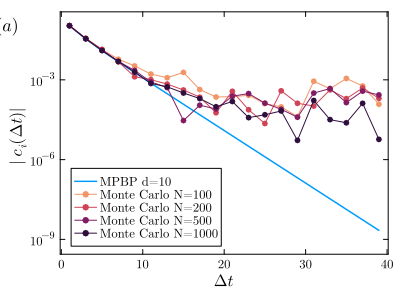

In [12]:
only_even = true
step = only_even + 1
c_bp_plot = c_bp[step:step:end]
pl1 = plot(1:step:maxdist, c_bp_plot, label="MPBP d=$d")
plot!(pl1; xlabel=L"\Delta t", size=(400,300),
    # ylabel=L"\langle \sigma_i^t\sigma_i^{t+\Delta t}\rangle - \langle \sigma_i^t\rangle\langle\sigma_i^{t+\Delta t}\rangle")
    ylabel=L"|c_i({\Delta t})|")
t = T - maxdist + 1
Ns_plot = Ns[1:end-1]
cg = cgrad(:matter, length(Ns_plot)+1, categorical=true)
for a in eachindex(Ns_plot)
    N = Ns_plot[a]
    c_mc = c[a]
    c_mc_plot = map(x -> x<0 ? eltype(c_mc)(NaN) : x, c_mc[t,t+step:step:end])
    c_mc_plot = abs.(c_mc[t,t+step:step:end])
    plot!(pl1, 1:step:maxdist, value.(c_mc_plot), c=cg[a+1], msc=cg[a+1],
        label="Monte Carlo N=$N", m=:o, yaxis=:log10, legend=:bottomleft,
        ylims = extrema(c_bp_plot) .* (2.0 .^ (-1,1)), lw=1)
end

plot!(pl1, ylims=(5e-10, 2e-1), yticks=10.0 .^ (-9:3:-3))
annotate!(pl1, (-6.5, 1e-1, Plots.text(L"(a)", 12)))

# plot!(pl1, thickness_scaling=scaling)

In [13]:
data = load("../data/glauber_autocovariance_ferro.jld2")
@unpack J, h, β, k, d, c_bp, maxdist = data;
J_bp, h_bp, β_bp, k_bp = J, h, β, k

data = load("../data/glauber_autocovariance_ferro_montecarlo2.jld2")
@unpack J, h, β, k, Ns, c, T = data

@assert J == J_bp && h == h_bp && β == β_bp && k == k_bp

println("Bond dimension: d=", d, ". N montecarlo samples: ", nsamples);

Bond dimension: d=14. N montecarlo samples: 10000


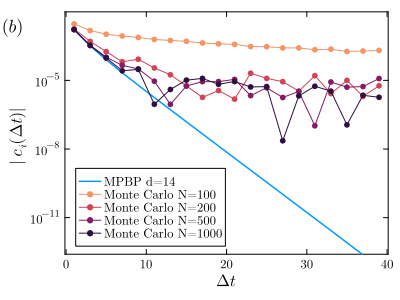

In [14]:
only_even = true
step = only_even + 1
c_bp_plot = c_bp[step:step:end]
pl2 = plot(1:step:maxdist, c_bp_plot, label="MPBP d=$d")
plot!(pl2; xlabel=L"\Delta t", size=(400,300),
    # ylabel=L"\langle \sigma_i^t\sigma_i^{t+\Delta t}\rangle - \langle \sigma_i^t\rangle\langle\sigma_i^{t+\Delta t}\rangle")
    ylabel=L"|c_i({\Delta t})|")
t = T - maxdist + 1
Ns_plot = Ns[1:end-1]
cg = cgrad(:matter, length(Ns_plot)+1, categorical=true)
for a in eachindex(Ns_plot)
    N = Ns[a]
    c_mc = c[a]
    c_mc_plot = map(x -> x<0 ? eltype(c_mc)(NaN) : x, c_mc[t,t+step:step:end])
    c_mc_plot = abs.(c_mc[t,t+step:step:end])
    plot!(pl2, 1:step:maxdist, value.(c_mc_plot), c=cg[a+1], msc=cg[a+1],
        label="Monte Carlo N=$N", m=:o, yaxis=:log10, legend=:bottomleft,
        ylims = extrema(c_bp_plot) .* (2.0 .^ (-2,1)), lw=1)
end

# annotate!(pl2, (14, 1e-4, Plots.text(L"(b)", 12)))
annotate!(pl2, (-6.5, 2e-3, Plots.text(L"(b)", 12)))
plot!(pl2, ylims=(5e-13, 5e-3), yticks=10.0 .^ (-11:3:-4))

# plot!(pl2, thickness_scaling=scaling)

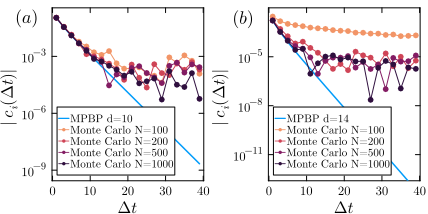

In [15]:
pl = plot(pl1, pl2, 
    size=(600,300)./scaling_single,
    margin=0Plots.mm, 
    # thickness_scaling=scaling,
    )
plot!(pl, legendfontsize=7,
    # left_margin=[0Plots.mm -5Plots.mm],
)

In [16]:
savefig(pl, "plot_outputs/glauber_autocovariance.pdf");

### Magnetization and covariance

In [129]:
@unpack J, h, β, ds, m_bp, r_bp, m_ss, r_ss = load("../data/glauber_para3.jld2")
ds_para, m_bp_para, r_bp_para, m_ss_para, r_ss_para = ds, m_bp, r_bp, m_ss, r_ss
@unpack J, h, β, ds, m_bp, r_bp, m_ss, r_ss = load("../data/glauber_ferro4.jld2")
ds_ferro, m_bp_ferro, r_bp_ferro, m_ss_ferro, r_ss_ferro = ds, m_bp, r_bp, m_ss, r_ss
@assert ds == ds_para

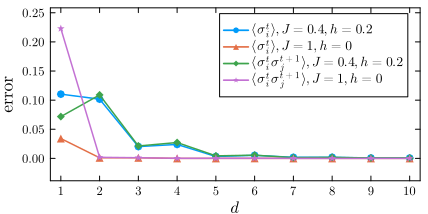

In [247]:
pl = plot(; xlabel=L"d", xticks=ds, ylabel="error")

plot!(pl, ds_para, abs.(abs.(m_bp_para) .- m_ss_para), m=:o, ms=4,
    label=L"\langle \sigma_i^t\rangle, J=0.4, h=0.2")
plot!(pl, ds_ferro, abs.(abs.(m_bp_ferro) .- m_ss_ferro), m=:utriangle,  ms=4,
    label=L"\langle \sigma_i^t\rangle, J=1, h=0")
plot!(pl, ds_para, abs.(r_bp_para .- r_ss_para), m=:diamond,  ms=4,
    label=L"\langle \sigma_i^t\sigma_j^{t+1}\rangle, J=0.4, h=0.2")
plot!(pl, ds_ferro, abs.(r_bp_ferro .- r_ss_ferro), m=:star,  ms=4,
    label=L"\langle \sigma_i^t\sigma_j^{t+1}\rangle, J=1, h=0")

plot!(pl; 
    # thickness_scaling=scaling,
    size = (600,300)./scaling_single,
    ylims = (-0.03, 0.25),
    margin = 0Plots.mm,
    xticks = 1:10,
    legendfontsize=9,
# yscale=:log10
)

In [248]:
savefig(pl, "plot_outputs/glauber_mag_corr.pdf");

## SIS compare meanfield

In [3]:
data = load("../data/sis_meanfield_avg3.jld2")
@unpack T_mf, Ts, λs, ρ, γ, N, nsamples, graph_seed,
    p_dmp_disc_avg, p_ibmf_disc_avg, p_cme_disc_avg,
    p_mc_val, p_bp = data;

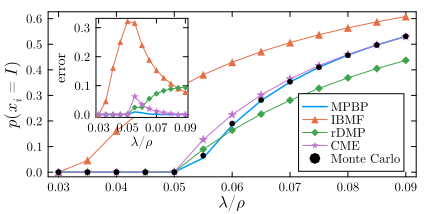

In [7]:
p_mc_ss = [mean(p[end-1000:end]) for p in p_mc_val]
p_dmp_ss = [p[end] for p in p_dmp_disc_avg]
p_cme_ss = [p[end] for p in p_cme_disc_avg]
p_ibmf_ss = [p[end] for p in p_ibmf_disc_avg]
p_bp_ss = p_bp

ms = 4; lw = 1

pl = plot(; xlabel=L"\lambda/\rho", ylabel=L"p(x_i=I)")
plot!(pl, λs, p_bp_ss, label="MPBP"; ms, lw=1.5)
plot!(pl, λs, p_ibmf_ss, label="IBMF"; m=:utriangle, ms, lw)
plot!(pl, λs, p_dmp_ss, label="rDMP"; m=:diamond, ms, lw)
plot!(pl, λs, p_cme_ss, label="CME"; m=:star, ms=5, lw)
plot!(pl, λs, p_mc_ss, label="Monte Carlo"; m=:o, ms=3, lw, st=:scatter, c=:black)

plot!(pl, inset=(1, bbox(0.13, 0.04, 0.25, 0.6)), subplot=2)

ms = 3


plot!(pl[2]; xlabel=L"\lambda/\rho", ylabel="error", labelfontsize=9)
plot!(pl[2], λs, abs.(p_bp_ss - p_mc_ss), label=""; lw=1.5)
plot!(pl[2], λs, abs.(p_ibmf_ss - p_mc_ss), label="", m=:utriangle; ms, lw)
plot!(pl[2], λs, abs.(p_dmp_ss - p_mc_ss), label="", m=:diamond; ms, lw)
plot!(pl[2], λs, abs.(p_cme_ss - p_mc_ss), label="", m=:star; ms=4, lw)
plot!(pl[2], xticks=λs[1:4:end])

plot!(pl, size=(600,300)./scaling_single, legend=:bottomright, margin=1Plots.mm)

In [8]:
savefig(pl, "plot_outputs/sis_meanfield.pdf");

## SIS continuous time

In [211]:
data = load("../data/sis_continuous4.jld2")
@unpack k, λs, ρ, Δts, ds, p_bp = data
k_mpbp = k; λs_mpbp = λs; ρ_mpbp = ρ
p_bp = p_bp[2:4]

data = load("../data/sis_gillespie.jld2")
@unpack k, λs, ρ, ps_gillespie, Ns = data
λs = λs[[1,2,4]]
ps_gillespie = ps_gillespie[[1,2,4]]
# @assert k_mpbp == k && λs_mpbp == λs && ρ_mpbp == ρ
ps_gill = last.(ps_gillespie);

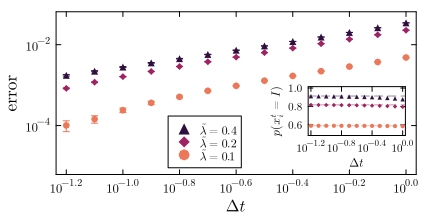

In [216]:
cg = cgrad(:matter, length(λs)+1, categorical=true)

# obtained with ./sampling_error.ipynb
ps_gill = [0.590524372390251, 0.8173073406770637, 0.9129458856216459]
err_gill = [3e-5, 2.2305098718432718e-5, 7.004148996899542e-5]
markers = [:o, :diamond, :utriangle]

pl = plot(; xaxis=:log10, xlabel=L"\Delta t")
for a in reverse(eachindex(λs))
    λ = λs[a]
    plot!(pl, Δts, abs.(p_bp[a] .- ps_gill[a:a]), label=L"\tilde\lambda=%$λ", c=cg[a+1],
        m=markers[a], ms=3.5, st=:scatter, ylabel="error",
        yerr = fill(err_gill[a], length(Δts)), msc=cg[a+1])
end

plot!(pl, size=(600,300)./scaling_single, legend=(0.9, 0.5), 
    ylims=(8e-6, 5e-2), 
    margin=1Plots.mm, xlims=extrema(Δts), xticks=Δts[1:2:end])
plot!(pl, legend=(0.4,0.28),
    yscale=:log10
)

plot!(pl, inset=(1, bbox(0.7, 0.46, 0.27, 0.3)), subplot=2,
    xlabel=L"\Delta t", ylabel=L"p(x_i^t=I)", 
    labelfontsize=8, tickfontsize=7,
    widen=true, bottom_margin=0Plots.mm,
    ylims=(0.5,1), xaxis=:log10, xticks=Δts[1:4:end], yticks=0.6:0.2:1)

for a in reverse(eachindex(λs))
    λ = λs[a]
    plot!(pl[2], Δts, p_bp[a], c=cg[a+1],
        m=markers[a], 
        ms=2.2, st=:scatter)
    hline!(pl[2], ps_gill[a:a], c=cg[a+1], ls=:dash, la=0.5, lw=1)
end

pl

In [217]:
savefig(pl, "plot_outputs/sis_continuous.pdf");

## Glauber nonreciprocal

In [202]:
data = load("../data/glauber_nonreciprocal.jld2")
@unpack kA, kB, nA, nB, JA, JB, h, β,
    m_mcA, m_mcB, m_mc_mean, m_bp, T = data;

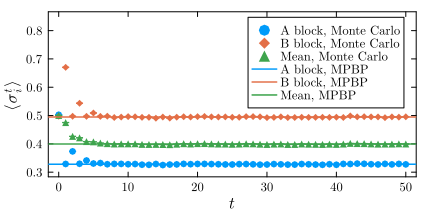

In [203]:
pl_mag = plot(; xlabel=L"t", ylabel=L"\langle \sigma_i^t \rangle")
markersize = 3.5
scatter!(pl_mag, 0:T, m_mcA, label="A block, Monte Carlo"; m=:o, markersize, msc=:auto)
scatter!(pl_mag, 0:T, m_mcB, label="B block, Monte Carlo"; m=:diamond, markersize, msc=:auto)
scatter!(pl_mag, 0:T, m_mc_mean, label="Mean, Monte Carlo"; m=:utriangle, markersize, msc=:auto)

fA = 1/kA / (1/kA + 1/kB)
fB = 1/kB / (1/kA + 1/kB)

lw = 1.5
hline!(pl_mag, m_bp[1:1], label="A block, MPBP", c=theme_palette(:auto)[1]; lw)
hline!(pl_mag, m_bp[2:2], label="B block, MPBP", c=theme_palette(:auto)[2]; lw)
hline!(pl_mag, [fA*m_bp[1:1]+fB*m_bp[2:2]], label="Mean, MPBP", c=theme_palette(:auto)[3]; lw)

plot!(pl_mag; size=(600,300)./scaling_single, margin=1Plots.mm,
    ylims = (0.3, 0.85),
#  legend=:outerbottomright
)

In [204]:
savefig(pl_mag, "plot_outputs/glauber_nonreciprocal.pdf");

## Bond dimension

### Glauber bond dimension

In [180]:
data = load("../data/glauber_bonddims5.jld2")
@unpack Js, h, β, k, tol_magnetiz, m, errs, ds = data;

In [181]:
tols = [8e-3, 2e-2, 1e-1]
tols = [1e-3, 1e-2, 1e-1]
tols = [5e-3]
dmax = [zeros(length(Js)) for _ in tols]
for a in eachindex(tols)
    for i in eachindex(Js)
        b = findfirst(<(tols[a]), errs[i])
        dmax[a][i] = (b===nothing ? NaN : ds[b])
    end
end
dmax

1-element Vector{Vector{Float64}}:
 [2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 7.0, NaN, NaN, NaN, 7.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0]

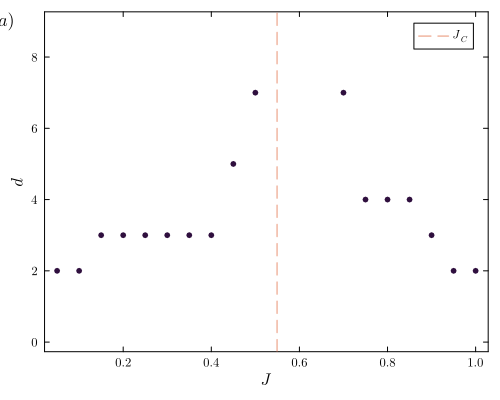

In [182]:
cg = cgrad(:matter, length(dmax)+1, categorical=true)
markers = [:o, :diamond, :utriangle, :star]
pl_bd_glauber = plot(; xlabel=L"J", ylabel=L"d", thikness_scaling=scaling)

for a in eachindex(dmax)
    plot!(pl_bd_glauber, Js, dmax[a], c=cg[a+1], 
        # label=L"\varepsilon=%$(tols[a])", 
        st=:scatter, m=markers[a], ms=3)
end

Jc = log(k/(k-2))/2
vline!(pl_bd_glauber, [Jc], ls=:dash, la=0.5, label=L"J_C")
# plot!(pl_bd_glauber, legend=:topleft)
annotate!(pl_bd_glauber, (-0.07, 9, Plots.text(L"(a)", 12)))
plot!(pl_bd_glauber, ylims=(0, 9))
plot(pl_bd_glauber, size=(500,400))

In [183]:
# savefig(pl, "plot_outputs/glauber_bonddims.pdf");

### SIS bond dimension

In [184]:
data = load("../data/sis_bonddims4.jld2")
@unpack λs, ρ, k, tol_prob, ps, errs, ds, αs = data;

In [185]:
tols = [8e-3, 2e-2, 1e-1]
tols = [1e-3, 1e-2, 1e-1]
tols = [5e-3]
dmax = [zeros(length(λs)) for _ in tols]
for a in eachindex(tols)
    for i in eachindex(λs)
        b = findfirst(<(tols[a]), errs[i])
        dmax[a][i] = (b===nothing ? NaN : ds[b])
    end
end
dmax

1-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, NaN, NaN, 11.0, 8.0, 7.0, 4.0, 4.0, 4.0]

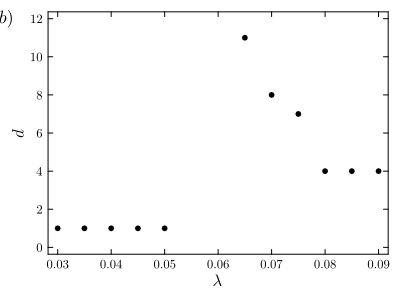

In [186]:
cg = cgrad(:matter, length(dmax)+1, categorical=true)
markers = [:o, :diamond, :utriangle, :star]
pl_bd_sis = plot(; xlabel=L"\lambda", ylabel=L"d", thikness_scaling=scaling)

for a in eachindex(dmax)
    plot!(pl_bd_sis, λs, dmax[a], 
        c = :black,
        # c=cg[a], 
        # label=L"\varepsilon=%$(tols[a])", 
        st=:scatter, m=markers[a], ms=3)
end

plot(pl_bd_sis, size=(500,500))
annotate!(pl_bd_sis, (0.02, 12, Plots.text(L"(b)", 12)))
plot!(pl_bd_sis, ylims=(0,12), yticks=0:2:12)


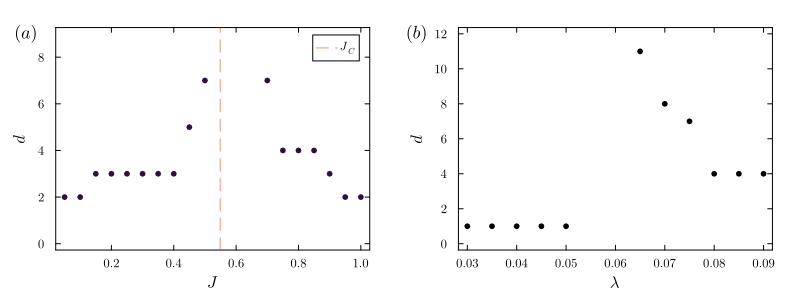

In [188]:
pl = plot(pl_bd_glauber, pl_bd_sis, size=(800,300), margin=5Plots.mm)

In [92]:
savefig(pl, "plot_outputs/bonddims.pdf");

### Autocorrelation length

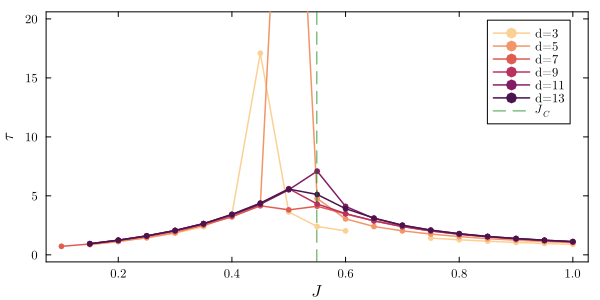

In [ ]:
data = load("../data/glauber_correlation_length2.jld2")
@unpack Js, h, k, ds, ls, ms, ms_exact = data

step = 2
cg = cgrad(:matter, length(ds)+1, categorical=true)
pl = plot(; xlabel=L"J", ylabel=L"\tau")
for a in eachindex(ds)[1:step:end]
    plot!(pl, Js, ls[a], c=cg[a+1], label="d=$(ds[a])", m=:o)
end
vline!(pl, [log(3)/2], ls=:dash, la=0.5, c=:green, label=L"J_C")

# scatter!(pl, [0.4], [1.732942630309602], c=:blue, label="d=10")
plot!(pl, ylims=(0,20))
plot(pl, size=(600,300))
# savefig(pl, "plot_outputs/autocorrelation_length.pdf")

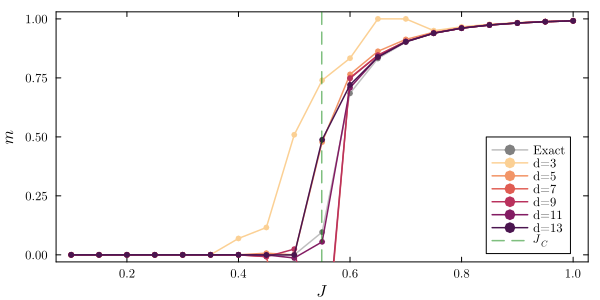

In [ ]:
pl = plot(; xlabel=L"J", ylabel=L"m")
plot!(pl, Js, ms_exact, label="Exact", m=:o, c=:gray, la=0.5)
for a in eachindex(ds)[1:step:end]
    plot!(pl, Js, ms[a], c=cg[a+1], label="d=$(ds[a])", m=:o)
end
vline!(pl, [log(3)/2], ls=:dash, la=0.5, label=L"J_C", c=:green)
plot(pl, size=(600,300), ylims=(0,1), legend=:bottomright)

## Small graph

### Glauber small graph

In [44]:
data = load("../data/glauber_small_graph.jld2")
@unpack J, h, T, nsamples_mc, p_bp, p_mc, g, cb, N = data;

┌ Warning: type IndexedGraphs.IndexedGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:577
┌ Warning: type Main.CB_BPVUMPS{ProgressMeter.ProgressUnknown,Main.#spin,TensorTrains.UniformTensorTrains.InfiniteUniformTensorTrain{Float64,4}} does not exist in workspace; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:577
┌ Warning: type ProgressMeter.ProgressUnknown does not exist in workspace; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:577
┌ Warning: type ProgressMeter.ProgressCore does not exist in workspace; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:577
┌ Warning: saved type Base.GenericIOBuffer{Vector{UInt8}} is missing field offset in workspace type; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/recons

CapturedException: MethodError: Cannot `convert` an object of type JLD2.ReconstructedMutable{Symbol("Base.GenericIOBuffer{Vector{UInt8}}"), (:data, :reinit, :readable, :writable, :seekable, :append, :size, :maxsize, :ptr, :mark), Tuple{Any, Bool, Bool, Bool, Bool, Bool, Vararg{Int64, 4}}} to an object of type IOBuffer
The function `convert` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  convert(::Type{T}, !Matched::T) where T
   @ Base Base.jl:126

Stacktrace:
  [1] rconvert(T::Type, x::JLD2.ReconstructedMutable{Symbol("Base.GenericIOBuffer{Vector{UInt8}}"), (:data, :reinit, :readable, :writable, :seekable, :append, :size, :maxsize, :ptr, :mark), Tuple{Any, Bool, Bool, Bool, Bool, Bool, Vararg{Int64, 4}}})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/custom_serialization.jl:9
  [2] macro expansion
    @ ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:660 [inlined]
  [3] jlconvert(::JLD2.MappedRepr{Base.TTY, JLD2.OnDiskRepresentation{(0, 0, 8, 16, 32, 40, 48, 56), Tuple{Ptr{Nothing}, Int64, Any, Base.GenericCondition{Base.Threads.SpinLock}, Any, Any, Any, Int64}, Tuple{JLD2.CustomSerialization{Nothing, nothing}, Int64, JLD2.RelOffset, JLD2.OnDiskRepresentation{(0, 8), Tuple{Base.IntrusiveLinkedList{Task}, Base.Threads.SpinLock}, Tuple{JLD2.RelOffset, JLD2.RelOffset}, 16}, JLD2.RelOffset, JLD2.RelOffset, JLD2.RelOffset, Int64}, 64}}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:652
  [4] read_scalar(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/io/dataio.jl:107
  [5] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, read_dataspace::Tuple{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:96
  [6] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, dataspace::JLD2.ReadDataspace, dt::JLD2.H5Datatype, layout::JLD2.DataLayout, filters::JLD2.FilterPipeline, header_offset::JLD2.RelOffset, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:84
  [7] load_dataset(f::JLD2.JLDFile{JLD2.MmapIO}, offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:48
  [8] jlconvert(::JLD2.MappedRepr{Any, JLD2.RelOffset}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, ::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/writing_datatypes.jl:338
  [9] jlconvert(::JLD2.MappedRepr{JLD2.ReconstructedMutable{:ProgressCore, (:color, :desc, :dt, :enabled, :offset, :output, :showspeed, :check_iterations, :counter, :lock, :numprintedvalues, :prev_update_count, :printed, :threads_used, :tinit, :tlast, :tsecond), Tuple{Symbol, String, Any, Bool, Int64, Any, Bool, Int64, Int64, Any, Int64, Int64, Bool, Any, Float64, Float64, Float64}}, JLD2.OnDiskRepresentation{(0, 16, 32, 40, 41, 49, 57, 58, 66, 74, 82, 90, 98, 99, 107, 115, 123), Tuple{Symbol, String, Any, Bool, Int64, Any, Bool, Int64, Int64, Any, Int64, Int64, Bool, Any, Float64, Float64, Float64}, Tuple{JLD2.Vlen{String}, JLD2.Vlen{String}, JLD2.RelOffset, Bool, Int64, JLD2.RelOffset, Bool, Int64, Int64, JLD2.RelOffset, Int64, Int64, Bool, JLD2.RelOffset, Float64, Float64, Float64}, 131}}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:642
 [10] read_scalar(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/io/dataio.jl:107
 [11] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, read_dataspace::Tuple{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:96
 [12] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, dataspace::JLD2.ReadDataspace, dt::JLD2.H5Datatype, layout::JLD2.DataLayout, filters::JLD2.FilterPipeline, header_offset::JLD2.RelOffset, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:84
 [13] load_dataset(f::JLD2.JLDFile{JLD2.MmapIO}, offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:48
 [14] jlconvert(::JLD2.MappedRepr{Any, JLD2.RelOffset}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, ::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/writing_datatypes.jl:338
 [15] jlconvert(::JLD2.MappedRepr{JLD2.ReconstructedMutable{:ProgressUnknown, (:done, :spinner, :spincounter, :core), Tuple{Bool, Bool, Int64, Any}}, JLD2.OnDiskRepresentation{(0, 1, 2, 10), Tuple{Bool, Bool, Int64, Any}, Tuple{Bool, Bool, Int64, JLD2.RelOffset}, 18}}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:642
 [16] read_scalar(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/io/dataio.jl:107
 [17] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, read_dataspace::Tuple{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:96
 [18] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, dataspace::JLD2.ReadDataspace, dt::JLD2.H5Datatype, layout::JLD2.DataLayout, filters::JLD2.FilterPipeline, header_offset::JLD2.RelOffset, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:84
 [19] load_dataset(f::JLD2.JLDFile{JLD2.MmapIO}, offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:48
 [20] jlconvert(::JLD2.MappedRepr{Any, JLD2.RelOffset}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, ::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/writing_datatypes.jl:338
 [21] jlconvert(::JLD2.MappedRepr{JLD2.ReconstructedMutable{Symbol("CB_BPVUMPS{ProgressUnknown,#spin,InfiniteUniformTensorTrain{Float64,4}}"), (:prog, :m, :Δs, :A, :εs), NTuple{5, Any}}, JLD2.OnDiskRepresentation{(0, 8, 16, 24, 32), NTuple{5, Any}, NTuple{5, JLD2.RelOffset}, 40}}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:642
 [22] read_scalar(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/io/dataio.jl:107
 [23] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, read_dataspace::Tuple{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:96
 [24] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, dataspace::JLD2.ReadDataspace, dt::JLD2.H5Datatype, layout::JLD2.DataLayout, filters::JLD2.FilterPipeline, header_offset::JLD2.RelOffset, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:84
 [25] load_dataset(f::JLD2.JLDFile{JLD2.MmapIO}, offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:48
 [26] getindex(g::JLD2.Group{JLD2.JLDFile{JLD2.MmapIO}}, name::String)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/groups.jl:99
 [27] getindex
    @ ~/.julia/packages/JLD2/IyyZz/src/JLD2.jl:349 [inlined]
 [28] loadtodict!(d::Dict{String, Any}, g::JLD2.JLDFile{JLD2.MmapIO}, prefix::String)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/loadsave.jl:162
 [29] loadtodict!
    @ ~/.julia/packages/JLD2/IyyZz/src/loadsave.jl:161 [inlined]
 [30] fileio_load(f::FileIO.File{FileIO.DataFormat{:JLD2}, String}; nested::Bool, kwargs::@Kwargs{})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/fileio.jl:43
 [31] fileio_load(f::FileIO.File{FileIO.DataFormat{:JLD2}, String})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/fileio.jl:37
 [32] #invokelatest#2
    @ ./essentials.jl:1055 [inlined]
 [33] invokelatest
    @ ./essentials.jl:1052 [inlined]
 [34] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::FileIO.Formatted; options::@Kwargs{})
    @ FileIO ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:219
 [35] action
    @ ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:196 [inlined]
 [36] action
    @ ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:185 [inlined]
 [37] load(::String; options::@Kwargs{})
    @ FileIO ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:113
 [38] load(::String)
    @ FileIO ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:109
 [39] top-level scope
    @ ~/MPSExperiments/scripts/plots.ipynb:1

In [45]:
plot(cb.Δs, xlabel="iter", ylabel="err", label="", size=(300,200), yaxis=:log10)

UndefVarError: UndefVarError: `cb` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [46]:
p_mc_ss = [mean(value, p[end-30:end]) for p in p_mc]

pl = scatter(p_bp, p_mc_ss, xlims=(-1,1), ylims=(-1,1), 
    xlabel="MPBP", ylabel="MonteCarlo",
    label="marginals", legend=:bottomright)
plot!(pl, [-1,1], [-1,1], label="", ls=:dash)

UndefVarError: UndefVarError: `p_mc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### SIS small graph

In [47]:
data = load("../data/sis_small_graph.jld2")
@unpack λ, ρ, α, T, nsamples_mc, p_bp, p_mc, cb, N = data;

┌ Warning: type IndexedGraphs.IndexedGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:577
┌ Warning: type Main.CB_BPVUMPS{ProgressMeter.ProgressUnknown,Main.#545#546,TensorTrains.UniformTensorTrains.InfiniteUniformTensorTrain{Float64,4}} does not exist in workspace; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:577
┌ Warning: type ProgressMeter.ProgressUnknown does not exist in workspace; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:577
┌ Warning: type ProgressMeter.ProgressCore does not exist in workspace; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:577
┌ Warning: saved type Base.GenericIOBuffer{Vector{UInt8}} is missing field offset in workspace type; reconstructing
└ @ JLD2 /home/crotti/.julia/packages/JLD2/IyyZz/src/data/rec

CapturedException: MethodError: Cannot `convert` an object of type JLD2.ReconstructedMutable{Symbol("Base.GenericIOBuffer{Vector{UInt8}}"), (:data, :reinit, :readable, :writable, :seekable, :append, :size, :maxsize, :ptr, :mark), Tuple{Any, Bool, Bool, Bool, Bool, Bool, Vararg{Int64, 4}}} to an object of type IOBuffer
The function `convert` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  convert(::Type{T}, !Matched::T) where T
   @ Base Base.jl:126

Stacktrace:
  [1] rconvert(T::Type, x::JLD2.ReconstructedMutable{Symbol("Base.GenericIOBuffer{Vector{UInt8}}"), (:data, :reinit, :readable, :writable, :seekable, :append, :size, :maxsize, :ptr, :mark), Tuple{Any, Bool, Bool, Bool, Bool, Bool, Vararg{Int64, 4}}})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/custom_serialization.jl:9
  [2] macro expansion
    @ ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:660 [inlined]
  [3] jlconvert(::JLD2.MappedRepr{Base.TTY, JLD2.OnDiskRepresentation{(0, 0, 8, 16, 32, 40, 48, 56), Tuple{Ptr{Nothing}, Int64, Any, Base.GenericCondition{Base.Threads.SpinLock}, Any, Any, Any, Int64}, Tuple{JLD2.CustomSerialization{Nothing, nothing}, Int64, JLD2.RelOffset, JLD2.OnDiskRepresentation{(0, 8), Tuple{Base.IntrusiveLinkedList{Task}, Base.Threads.SpinLock}, Tuple{JLD2.RelOffset, JLD2.RelOffset}, 16}, JLD2.RelOffset, JLD2.RelOffset, JLD2.RelOffset, Int64}, 64}}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:652
  [4] read_scalar(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/io/dataio.jl:107
  [5] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, read_dataspace::Tuple{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:96
  [6] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, dataspace::JLD2.ReadDataspace, dt::JLD2.H5Datatype, layout::JLD2.DataLayout, filters::JLD2.FilterPipeline, header_offset::JLD2.RelOffset, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:84
  [7] load_dataset(f::JLD2.JLDFile{JLD2.MmapIO}, offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:48
  [8] jlconvert(::JLD2.MappedRepr{Any, JLD2.RelOffset}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, ::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/writing_datatypes.jl:338
  [9] jlconvert(::JLD2.MappedRepr{JLD2.ReconstructedMutable{:ProgressCore, (:color, :desc, :dt, :enabled, :offset, :output, :showspeed, :check_iterations, :counter, :lock, :numprintedvalues, :prev_update_count, :printed, :threads_used, :tinit, :tlast, :tsecond), Tuple{Symbol, String, Any, Bool, Int64, Any, Bool, Int64, Int64, Any, Int64, Int64, Bool, Any, Float64, Float64, Float64}}, JLD2.OnDiskRepresentation{(0, 16, 32, 40, 41, 49, 57, 58, 66, 74, 82, 90, 98, 99, 107, 115, 123), Tuple{Symbol, String, Any, Bool, Int64, Any, Bool, Int64, Int64, Any, Int64, Int64, Bool, Any, Float64, Float64, Float64}, Tuple{JLD2.Vlen{String}, JLD2.Vlen{String}, JLD2.RelOffset, Bool, Int64, JLD2.RelOffset, Bool, Int64, Int64, JLD2.RelOffset, Int64, Int64, Bool, JLD2.RelOffset, Float64, Float64, Float64}, 131}}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:642
 [10] read_scalar(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/io/dataio.jl:107
 [11] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, read_dataspace::Tuple{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:96
 [12] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, dataspace::JLD2.ReadDataspace, dt::JLD2.H5Datatype, layout::JLD2.DataLayout, filters::JLD2.FilterPipeline, header_offset::JLD2.RelOffset, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:84
 [13] load_dataset(f::JLD2.JLDFile{JLD2.MmapIO}, offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:48
 [14] jlconvert(::JLD2.MappedRepr{Any, JLD2.RelOffset}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, ::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/writing_datatypes.jl:338
 [15] jlconvert(::JLD2.MappedRepr{JLD2.ReconstructedMutable{:ProgressUnknown, (:done, :spinner, :spincounter, :core), Tuple{Bool, Bool, Int64, Any}}, JLD2.OnDiskRepresentation{(0, 1, 2, 10), Tuple{Bool, Bool, Int64, Any}, Tuple{Bool, Bool, Int64, JLD2.RelOffset}, 18}}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:642
 [16] read_scalar(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/io/dataio.jl:107
 [17] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, read_dataspace::Tuple{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:96
 [18] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, dataspace::JLD2.ReadDataspace, dt::JLD2.H5Datatype, layout::JLD2.DataLayout, filters::JLD2.FilterPipeline, header_offset::JLD2.RelOffset, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:84
 [19] load_dataset(f::JLD2.JLDFile{JLD2.MmapIO}, offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:48
 [20] jlconvert(::JLD2.MappedRepr{Any, JLD2.RelOffset}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, ::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/writing_datatypes.jl:338
 [21] jlconvert(::JLD2.MappedRepr{JLD2.ReconstructedMutable{Symbol("CB_BPVUMPS{ProgressUnknown,#545#546,InfiniteUniformTensorTrain{Float64,4}}"), (:prog, :m, :Δs, :A, :εs), NTuple{5, Any}}, JLD2.OnDiskRepresentation{(0, 8, 16, 24, 32), NTuple{5, Any}, NTuple{5, JLD2.RelOffset}, 40}}, f::JLD2.JLDFile{JLD2.MmapIO}, ptr::Ptr{Nothing}, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/data/reconstructing_datatypes.jl:642
 [22] read_scalar(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, header_offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/io/dataio.jl:107
 [23] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, rr::Any, read_dataspace::Tuple{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:96
 [24] read_data(f::JLD2.JLDFile{JLD2.MmapIO}, dataspace::JLD2.ReadDataspace, dt::JLD2.H5Datatype, layout::JLD2.DataLayout, filters::JLD2.FilterPipeline, header_offset::JLD2.RelOffset, attributes::Vector{JLD2.ReadAttribute})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:84
 [25] load_dataset(f::JLD2.JLDFile{JLD2.MmapIO}, offset::JLD2.RelOffset)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/datasets.jl:48
 [26] getindex(g::JLD2.Group{JLD2.JLDFile{JLD2.MmapIO}}, name::String)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/groups.jl:99
 [27] getindex
    @ ~/.julia/packages/JLD2/IyyZz/src/JLD2.jl:349 [inlined]
 [28] loadtodict!(d::Dict{String, Any}, g::JLD2.JLDFile{JLD2.MmapIO}, prefix::String)
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/loadsave.jl:162
 [29] loadtodict!
    @ ~/.julia/packages/JLD2/IyyZz/src/loadsave.jl:161 [inlined]
 [30] fileio_load(f::FileIO.File{FileIO.DataFormat{:JLD2}, String}; nested::Bool, kwargs::@Kwargs{})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/fileio.jl:43
 [31] fileio_load(f::FileIO.File{FileIO.DataFormat{:JLD2}, String})
    @ JLD2 ~/.julia/packages/JLD2/IyyZz/src/fileio.jl:37
 [32] #invokelatest#2
    @ ./essentials.jl:1055 [inlined]
 [33] invokelatest
    @ ./essentials.jl:1052 [inlined]
 [34] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::FileIO.Formatted; options::@Kwargs{})
    @ FileIO ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:219
 [35] action
    @ ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:196 [inlined]
 [36] action
    @ ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:185 [inlined]
 [37] load(::String; options::@Kwargs{})
    @ FileIO ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:113
 [38] load(::String)
    @ FileIO ~/.julia/packages/FileIO/hCQX2/src/loadsave.jl:109
 [39] top-level scope
    @ ~/MPSExperiments/scripts/plots.ipynb:1

In [48]:
plot(cb.Δs, xlabel="iter", ylabel="err", label="", size=(300,200), yaxis=:log10)

UndefVarError: UndefVarError: `cb` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [49]:
p_mc_ss = [mean(value, p[end-30:end]) for p in p_mc];

UndefVarError: UndefVarError: `p_mc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

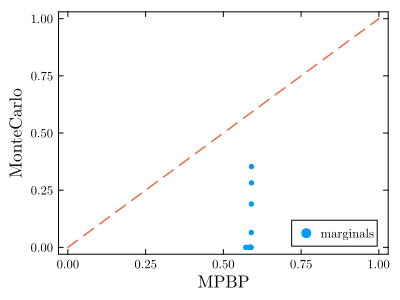

In [50]:
pl = scatter(p_bp, p_mc_ss, xlims=(0,1), ylims=(0,1), 
    xlabel="MPBP", ylabel="MonteCarlo",
    label="marginals", legend=:bottomright)
plot!(pl, [0,1], [0,1], label="", ls=:dash)

In [51]:
plot(abs.(p_mc_ss - p_bp), ylims=(0,1))

DimensionMismatch: DimensionMismatch: a has size (13,), b has size (9,), mismatch at dim 1

In [52]:
# savefig(pl, "plot_outputs/sis_small_graph.pdf");

In [53]:
pl = plot(; legend=:bottomright)
for i in eachindex(p_bp)
    plot!(pl, value.(p_mc[i]), c=theme_palette(:auto)[mod1(i, 16)])
    hline!(pl, [p_bp[i]], label="$i", c=theme_palette(:auto)[mod1(i, 16)])
end
pl

UndefVarError: UndefVarError: `p_mc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### New parameters

In [ ]:
# data = load("../data/sis_continuous_new.jld2")
# @unpack k, λ, ρ, Δts, d, p_bp = data
# k_mpbp = k; λ_mpbp = λ; ρ_mpbp = ρ

# data = load("../data/sis_gillespie_new.jld2")
# @unpack k, λ, ρ, ps_gillespie, Ns = data
# @assert k_mpbp == k && λ_mpbp == λ && ρ_mpbp == ρ

# println("p gillespie: ", last(ps_gillespie))

p gillespie: 0.5905388814569539


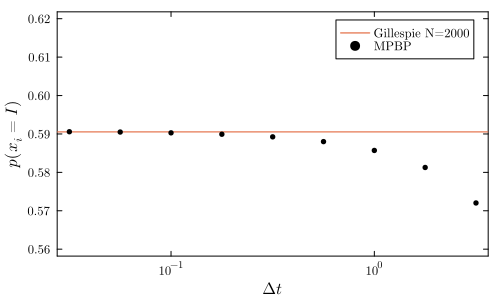

In [ ]:
# pl = plot(; xlabel=L"\Delta t", ylabel=L"p(x_i=I)")

# i = lastindex(ps_gillespie)
# hline!(pl, [ps_gillespie[i]], ls=:solid, label="Gillespie N=$(Ns[i])",
#         ylims=(0.56, 0.62), la=0.8, c=myred)

# scatter!(pl, Δts, p_bp, xaxis=:log10, c=:black, label="MPBP")

# plot!(pl, size=(500,300), legend=:topright)

In [ ]:
# savefig(pl, "plot_outputs/sis_continuous.pdf");

### Discrete vs continuous montecarlo

In [ ]:
# data = load("../data/compare_montecarlo_gillespie.jld2")
# @unpack T, N, k, λ, ρ, γ, nsamples, Δts, m_gill, ms_mc = data;

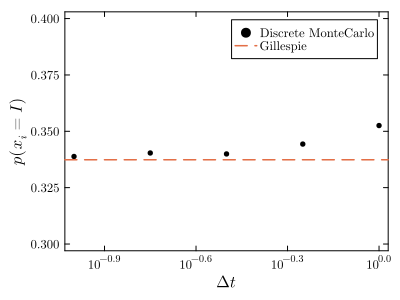

In [ ]:
# m_gill_ss = mean(m_gill[end-end÷6:end])
# ms_mc_ss = [mean(m[end-end÷6:end]) for m in ms_mc]

# pl = scatter(Δts, ms_mc_ss, xaxis=:log10, c=:black, 
#     xlabel=L"\Delta t", ylabel=L"p(x_i=I)", label="Discrete MonteCarlo")
# hline!(pl, [m_gill_ss], label="Gillespie", ls=:dash, ylims=(0.3,0.4))